In [7]:
#Gerekli Kütüphanelerin Yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [8]:
#pandas kütüphanesini kullanarak bir CSV dosyasını okuyup ilk 5 satırını ekrana yazdırır. 
data = pd.read_csv("/Users/eceguney/Desktop/VERİ BİLİMİ DERS NOTLARI/KOD ÇALIŞMALARIM/instagram_reach_analysis/Instagram data.csv", encoding='latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [9]:
#Her sütun için eksik (NaN) değerlerin sayısını hesaplar ve toplamını ekrana yazdırır. 

data.isnull().sum()


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [ ]:
#Veri çerçevesindeki (DataFrame) eksik (NaN) değer içeren tüm satırları kaldırır.
data = data.dropna()

In [ ]:
#Veri çerçevesi hakkında özet bilgi verir.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


/var/folders/zp/n215vqkj39v_7v8r5wrq1rdw0000gn/T/ipykernel_17628/4127021947.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


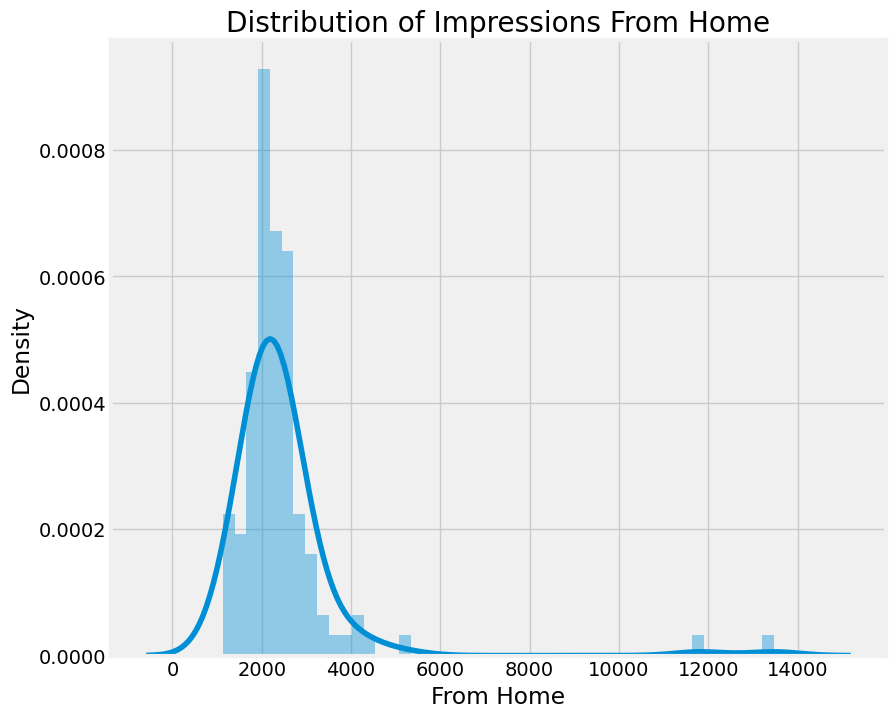

In [ ]:
#matplotlib ve seaborn kütüphanelerini kullanarak "From Home" sütunundaki verilerin dağılımını görselleştirir.
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

/var/folders/zp/n215vqkj39v_7v8r5wrq1rdw0000gn/T/ipykernel_17628/671336047.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


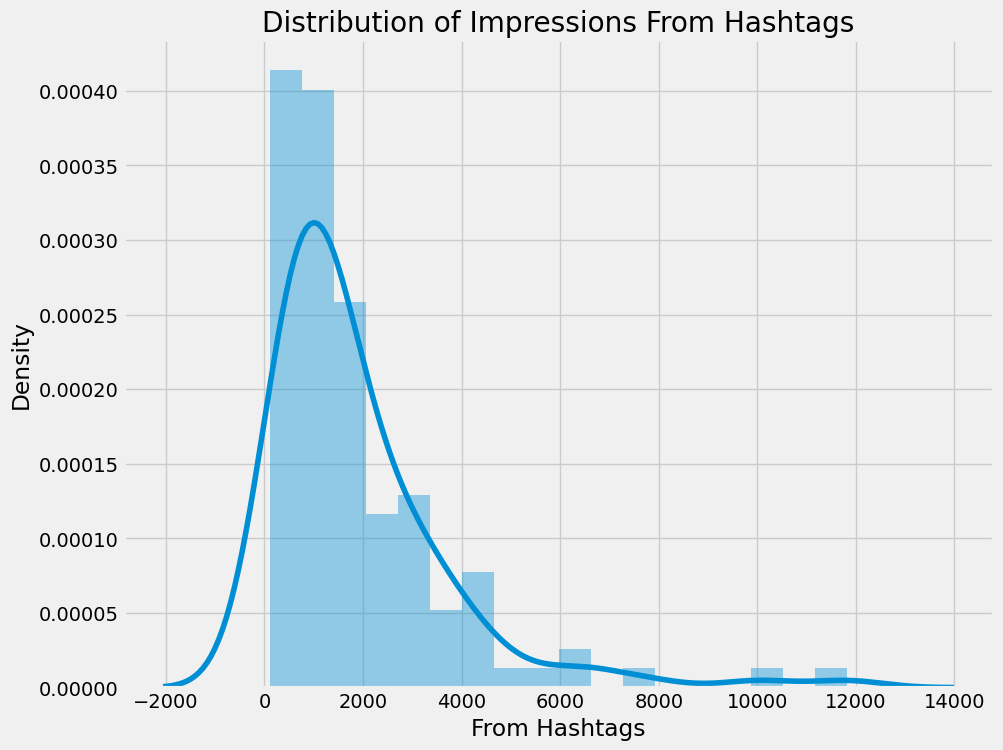

In [ ]:
#matplotlib ve seaborn kütüphanelerini kullanarak "From Hashtags" sütunundaki verilerin dağılımını bir histogram ve yoğunluk grafiği şeklinde gösterir.
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

/var/folders/zp/n215vqkj39v_7v8r5wrq1rdw0000gn/T/ipykernel_18061/252612868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


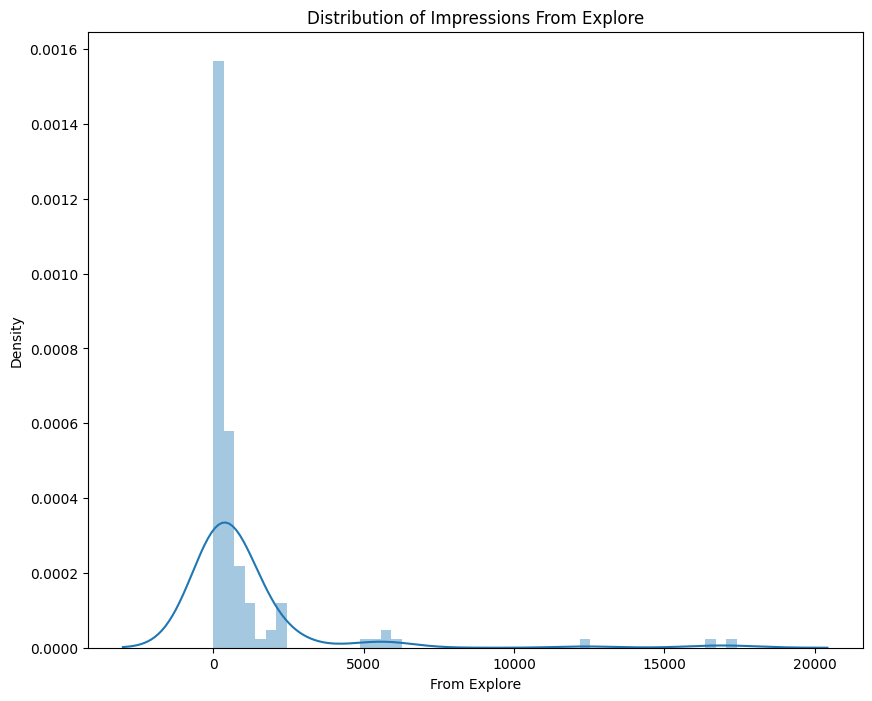

In [11]:
#matplotlib ve seaborn kütüphanelerini kullanarak "From Explore" sütunundaki verilerin dağılımını bir histogram ve yoğunluk grafiği ile gösterir. 
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

In [12]:
#plotly kütüphanesini kullanarak Instagram gönderilerinin çeşitli kaynaklardan gelen izlenmelerinin oranlarını gösteren bir dairesel grafik (pie chart) oluşturur. 

home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

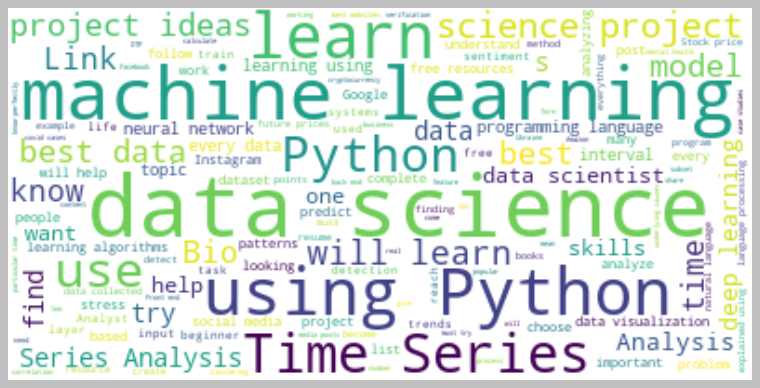

In [13]:
#matplotlib ve wordcloud kütüphanelerini kullanarak bir kelime bulutu (word cloud) oluşturur. 

text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

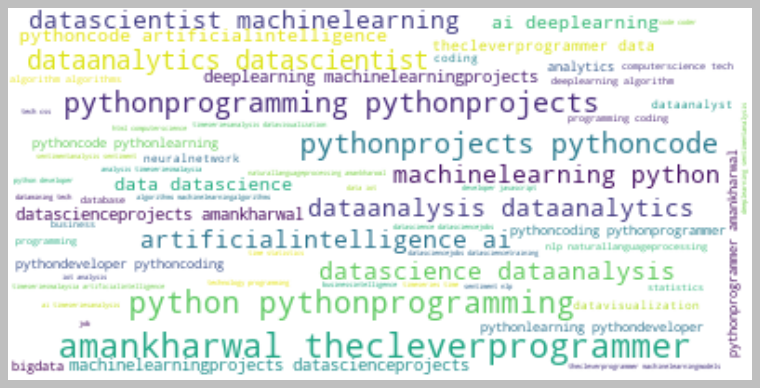

In [14]:
#matplotlib ve wordcloud kütüphanelerini kullanarak bir kelime bulutu (word cloud) oluşturur, ancak bu sefer Hashtags sütunundaki veriler kullanılarak kelime bulutu oluşturulur. 

text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
#plotly kütüphanesini kullanarak "Impressions" (izlenmeler) ve "Likes" (beğeniler) arasındaki ilişkiyi görselleştiren bir saçılım grafiği (scatter plot) oluşturur.
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [16]:
#plotly kütüphanesini kullanarak "Impressions" (izlenmeler) ve "Comments" (yorumlar) arasındaki ilişkiyi görselleştiren bir saçılım grafiği (scatter plot) oluşturur.
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [17]:
#plotly kütüphanesini kullanarak "Impressions" (izlenmeler) ve "Shares" (paylaşımlar) arasındaki ilişkiyi gösteren bir saçılım grafiği (scatter plot) oluşturur. 
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [ ]:
#plotly kütüphanesini kullanarak "Impressions" (izlenmeler) ve "Saves" (kaydetmeler) arasındaki ilişkiyi gösteren bir saçılım grafiği (scatter plot) oluşturur. 
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [ ]:
#Sayı olmayan sütunları dışarıda bırakma
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
print(correlation["Impressions"].sort_values(ascending=False))


Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [28]:
#Veri türlerini kontrol etme
print(data.dtypes)

Impressions        int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Comments           int64
Shares             int64
Likes              int64
Profile Visits     int64
Follows            int64
Caption           object
Hashtags          object
dtype: object


In [29]:
#Sayısal olmayan sütunları kaldırma
data = data.select_dtypes(include=[np.number])
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))


Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [30]:
#data veri çerçevesindeki sayısal sütunlar arasındaki korelasyonları hesaplayarak, "Impressions" sütunuyla olan korelasyonları sıralar ve yazdırır. 

correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))


Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [ ]:
#data veri çerçevesinde "Follows" (takipçi kazanma) ve "Profile Visits" (profil ziyaretleri) sütunlarını kullanarak dönüşüm oranını hesaplar.

conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [32]:
#plotly kütüphanesini kullanarak "Profile Visits" (profil ziyaretleri) ve "Follows" (takipçi kazanma) arasındaki ilişkiyi gösteren bir saçılım grafiği (scatter plot) oluşturur. 

figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [33]:
#scikit-learn kütüphanesini kullanarak veri setinizi eğitim ve test verilerine ayırır. 

x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [34]:
#PassiveAggressiveRegressor modelini kullanarak eğitim verileriyle bir regresyon modeli oluşturur ve ardından modelin test seti üzerindeki başarımını değerlendirir. 

model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.892669661621658

In [35]:
#PassiveAggressiveRegressor modelini kullanarak verilen özelliklerle (features) bir tahmin yapar.
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([12914.10861831])